In [6]:
import sys
import logging
import math

import pandas as pd
import numpy as np
from functools import reduce

import matplotlib
import matplotlib.pyplot as plt

from IPython.core.display import HTML

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

import plotly.express as px

%matplotlib inline

matplotlib.style.use("Solarize_Light2")

sys.path.insert(0, "/opt/vssexclude/personal/kaggle/k_tab_sept")

In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [3]:
import src.config.constants as constants
import src.munging as process_data
import src.viz as viz
import src.common as common

In [4]:
logger = common.get_logger("eda")

In [8]:
sub_1_predition_name = (
    "sub_lgb_K5_nonull_mean_sum_max_no_imp_no_scaler_params_K_0924_1159_0.81605.gz"
)
sub_1_oof_name = (
    "oof_lgb_K5_nonull_mean_sum_max_no_imp_no_scaler_params_K_0924_1159_0.81605.csv"
)

sub_1_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_1_predition_name}")
sub_1_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_1_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_1_test_pred.shape}, {sub_1_oof_pred.shape}"
)

sub_2_predition_name = (
    "sub_lgb_K10_nonull_mean_sum_max_mean_imp_no_scaler_params_K_0924_1406_0.81633.gz"
)
sub_2_oof_name = (
    "oof_lgb_K10_nonull_mean_sum_max_mean_imp_no_scaler_params_K_0924_1406_0.81633.csv"
)

sub_2_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_2_predition_name}")
sub_2_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_2_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_2_test_pred.shape}, {sub_2_oof_pred.shape}"
)


sub_3_predition_name = (
    "sub_xgb_K10_nonull_mean_sum_max_custom_imp_StScaler_K_params_0921_2239_0.81649.gz"
)
sub_3_oof_name = (
    "oof_xgb_K10_nonull_mean_sum_max_custom_imp_StScaler_K_params_0921_2239_0.81649.csv"
)

sub_3_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_3_predition_name}")
sub_3_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_3_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_3_test_pred.shape}, {sub_3_oof_pred.shape}"
)

sub_4_predition_name = (
    "sub_xgb_K10_nonull_mean_sum_max_no_imp_no_scaler_K_params_0922_1630_0.81634.gz"
)
sub_4_oof_name = (
    "oof_xgb_K10_nonull_mean_sum_max_no_imp_no_scaler_K_params_0922_1630_0.81634.csv"
)

sub_4_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_4_predition_name}")
sub_4_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_4_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_4_test_pred.shape}, {sub_4_oof_pred.shape}"
)

sub_5_predition_name = (
    "sub_cat_K10_nonull_full_data_mean_sum_max_Kaggle_bin_params_0921_2000_0.81612.gz"
)
sub_5_oof_name = (
    "oof_cat_K10_nonull_full_data_mean_sum_max_Kaggle_bin_params_0921_2000_0.81612.csv"
)

sub_5_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_5_predition_name}")
sub_5_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_5_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_5_test_pred.shape}, {sub_5_oof_pred.shape}"
)


sub_6_predition_name = (
    "sub_cat_K10_nonull_mean_sum_max_noImp_noScaler_K_params_0922_0747_0.81549.gz"
)
sub_6_oof_name = (
    "oof_cat_K10_nonull_mean_sum_max_noImp_noScaler_K_params_0922_0747_0.81549.csv"
)

sub_6_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_6_predition_name}")
sub_6_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_6_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_6_test_pred.shape}, {sub_6_oof_pred.shape}"
)


# New submissions

sub_7_predition_name = "sub_lgb_K10_nonull_mean_sum_max_40_48_95_3_mean_imp_no_scaler_params_K_0928_1536_0.81645.gz"
sub_7_oof_name = "oof_lgb_K10_nonull_mean_sum_max_40_48_95_3_mean_imp_no_scaler_params_K_0928_1536_0.81645.csv"

sub_7_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_7_predition_name}")
sub_7_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_7_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_7_test_pred.shape}, {sub_7_oof_pred.shape}"
)

sub_8_predition_name = "sub_lgb_K10_nonull_mean_sum_max_40_48_95_3_no_imp_no_scaler_params_K_0928_1834_0.81627.gz"
sub_8_oof_name = "oof_lgb_K10_nonull_mean_sum_max_40_48_95_3_no_imp_no_scaler_params_K_0928_1834_0.81627.csv"

sub_8_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_8_predition_name}")
sub_8_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_8_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_8_test_pred.shape}, {sub_8_oof_pred.shape}"
)

# tsne
sub_9_predition_name = "sub_lgb_K5_nonull_mean_sum_max_tsne_0917_1621_0.81337.gz"
sub_9_oof_name = "oof_lgb_K5_nonull_mean_sum_max_tsne_0917_1621_0.81337.csv"

sub_9_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_9_predition_name}")
sub_9_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_9_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_9_test_pred.shape}, {sub_9_oof_pred.shape}"
)

# all features : Didn't improve the score
sub_10_predition_name = "sub_lgb_all_features_params_from_K_0929_1848_0.81581.gz"
sub_10_oof_name = "oof_lgb_all_features_params_from_K_0929_1848_0.81581.csv"

sub_10_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_10_predition_name}")
sub_10_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_10_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_10_test_pred.shape}, {sub_10_oof_pred.shape}"
)

# Logistic Regression
sub_11_predition_name = "sub_logistic_K10_nonull_mean_sum_max_f40_48_95_3_no_imp_no_scaler_K_params_0928_1259_0.79925.gz"
sub_11_oof_name = "oof_logistic_K10_nonull_mean_sum_max_f40_48_95_3_no_imp_no_scaler_K_params_0928_1259_0.79925.csv"

sub_11_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_11_predition_name}")
sub_11_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_11_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_11_test_pred.shape}, {sub_11_oof_pred.shape}"
)


# New XGB
sub_12_predition_name = "sub_xgb_K10_nonull_mean_sum_max_f40_48_95_3_custom_imp_StScaler_K_params_0927_1959_0.81639.gz"
sub_12_oof_name = "oof_xgb_K10_nonull_mean_sum_max_f40_48_95_3_custom_imp_StScaler_K_params_0927_1959_0.81639.csv"

sub_12_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_12_predition_name}")
sub_12_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_12_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_12_test_pred.shape}, {sub_12_oof_pred.shape}"
)

sub_13_predition_name = "sub_xgb_K10_nonull_mean_sum_max_f40_48_95_3_no_imp_no_scaler_K_params_0928_1645_0.81514.gz"
sub_13_oof_name = "oof_xgb_K10_nonull_mean_sum_max_f40_48_95_3_no_imp_no_scaler_K_params_0928_1645_0.81514.csv"

sub_13_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_13_predition_name}")
sub_13_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_13_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_13_test_pred.shape}, {sub_13_oof_pred.shape}"
)

# New Cat
sub_14_predition_name = "sub_cat_K10_nonull_mean_sum_max_f40_48_95_3_SImp_RobScaler_K_params_0929_0406_0.81628.gz"
sub_14_oof_name = "oof_cat_K10_nonull_mean_sum_max_f40_48_95_3_SImp_RobScaler_K_params_0929_0406_0.81628.csv"

sub_14_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_14_predition_name}")
sub_14_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_14_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_14_test_pred.shape}, {sub_14_oof_pred.shape}"
)

# New LGB Mean Encoding
sub_15_predition_name = "sub_lgb_K10_nonull_mean_sum_max_40_48_95_3_mean_encoding_mean_imp_no_scaler_params_K_0928_2156_0.81650.gz"
sub_15_oof_name = "oof_lgb_K10_nonull_mean_sum_max_40_48_95_3_mean_encoding_mean_imp_no_scaler_params_K_0928_2156_0.81650.csv"

sub_15_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_15_predition_name}")
sub_15_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_15_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_15_test_pred.shape}, {sub_15_oof_pred.shape}")

# New LGB Pseudo Labeling
sub_16_predition_name = "sub_lgb_K10_nonull_mean_sum_max_40_48_95_3_pseudo_labeling_mean_imp_no_scaler_params_K_0929_1237_0.82345.gz"
sub_16_oof_name = "oof_lgb_K10_nonull_mean_sum_max_40_48_95_3_pseudo_labeling_mean_imp_no_scaler_params_K_0929_1237_0.82345.csv"

sub_16_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_16_predition_name}")
sub_16_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_16_oof_name}")
sub_16_oof_pred.columns = ["id", "0"]
logger.info(
    f"Shape of submission and oof file {sub_16_test_pred.shape}, {sub_16_oof_pred.shape}")

# New Cat
sub_17_predition_name = "sub_cat_K10_nonull_mean_sum_max_f40_48_95_3_noImp_noScaler_K_params_0929_1426_0.81556.gz"
sub_17_oof_name = "oof_cat_K10_nonull_mean_sum_max_f40_48_95_3_noImp_noScaler_K_params_0929_1426_0.81556.csv"

sub_17_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_17_predition_name}")
sub_17_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_17_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_17_test_pred.shape}, {sub_17_oof_pred.shape}")

# LGB Mean/Median
sub_18_predition_name = "sub_lgb_SK10_nonull_mean_sum_max_40_48_95_3_mean_median_imp_no_scaler_params_K_0929_1825_0.81638.gz"
sub_18_oof_name = "oof_lgb_SK10_nonull_mean_sum_max_40_48_95_3_mean_median_imp_no_scaler_params_K_0929_1825_0.81638.csv"

sub_18_test_pred = pd.read_csv(f"{constants.SUBMISSION_DIR}/{sub_18_predition_name}")
sub_18_oof_pred = pd.read_csv(f"{constants.OOF_DIR}/{sub_18_oof_name}")
logger.info(
    f"Shape of submission and oof file {sub_18_test_pred.shape}, {sub_18_oof_pred.shape}")

oof_dfs = [
    sub_1_oof_pred,
    sub_2_oof_pred,
    sub_3_oof_pred,
    sub_4_oof_pred,
    sub_5_oof_pred,
    sub_6_oof_pred,
    sub_7_oof_pred,
    sub_8_oof_pred,
    sub_9_oof_pred,
    sub_10_oof_pred,
    sub_11_oof_pred,
    sub_12_oof_pred,
    sub_13_oof_pred,
    sub_14_oof_pred,
    sub_15_oof_pred,
    sub_16_oof_pred,
    sub_17_oof_pred,
    sub_18_oof_pred,
]

l1_train_df = reduce(
    lambda left, right: pd.merge(left, right, on=["id"], how="left"), oof_dfs
)
l1_train_df.columns = [
    "id",
    "sub_1",
    "sub_2",
    "sub_3",
    "sub_4",
    "sub_5",
    "sub_6",
    "sub_7",
    "sub_8",
    "sub_9",
    "sub_10",
    "sub_11",
    "sub_12",
    "sub_13",
    "sub_14",
    "sub_15",
    "sub_16",
    "sub_17",
    "sub_18",
]
l1_train_df = l1_train_df.set_index("id")

prediction_dfs = [
    sub_1_test_pred,
    sub_2_test_pred,
    sub_3_test_pred,
    sub_4_test_pred,
    sub_5_test_pred,
    sub_6_test_pred,
    sub_7_test_pred,
    sub_8_test_pred,
    sub_9_test_pred,
    sub_10_test_pred,
    sub_11_test_pred,
    sub_12_test_pred,
    sub_13_test_pred,
    sub_14_test_pred,
    sub_15_test_pred,
    sub_16_test_pred,
    sub_17_test_pred,
    sub_18_test_pred,
]
l1_test_df = reduce(
    lambda left, right: pd.merge(left, right, on=["id"], how="left"), prediction_dfs
)
l1_test_df.columns = [
    "id",
    "sub_1",
    "sub_2",
    "sub_3",
    "sub_4",
    "sub_5",
    "sub_6",
    "sub_7",
    "sub_8",
    "sub_9",
    "sub_10",
    "sub_11",
    "sub_12",
    "sub_13",
    "sub_14",
    "sub_15",
    "sub_16",
    "sub_17",
    "sub_18",
]
l1_test_df = l1_test_df.set_index("id")

[INFO]2021-09-30 09:42:39,377:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:39,647:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:39,914:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:40,180:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:40,476:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:40,787:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:41,055:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:41,325:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:41,863:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:42,134:eda:Shape of submission and oof file (493474, 2), (957919, 2)
[INFO]2021-09-30 09:42:42,407:eda:Shape of submission and oof file (493474, 2), 

In [10]:
l1_test_df.corr()

,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,sub_9,sub_10,sub_11,sub_12,sub_13,sub_14,sub_15,sub_16,sub_17,sub_18
id,,,,,,,,,,,,,,,,,,
957919,0.586674,0.570629,0.574892,0.576865,0.313042,0.280372,0.563307,0.576763,0.597138,0.585819,0.398554,0.577470,0.565249,0.285151,0.567686,0.565427,0.285058,0.564778
957920,0.123036,0.118299,0.122321,0.120261,-1.991545,-2.012533,0.119408,0.120356,0.111463,0.115711,0.206685,0.120057,0.158361,-1.980137,0.121206,0.113520,-2.051165,0.119795
957921,0.633575,0.627519,0.632745,0.636654,0.518727,0.523176,0.633242,0.632802,0.627580,0.625913,0.373492,0.633486,0.624056,0.528831,0.629423,0.639891,0.480563,0.630417
957922,0.128614,0.130883,0.132421,0.126317,-1.876890,-1.880550,0.130952,0.128878,0.126297,0.131199,0.260983,0.133128,0.164802,-1.924863,0.131103,0.126686,-1.869343,0.130489
957923,0.152090,0.153203,0.157356,0.151618,-1.775676,-1.832751,0.153720,0.151904,0.141184,0.142863,0.291207,0.154617,0.185953,-1.720034,0.150967,0.151533,-1.829254,0.150890


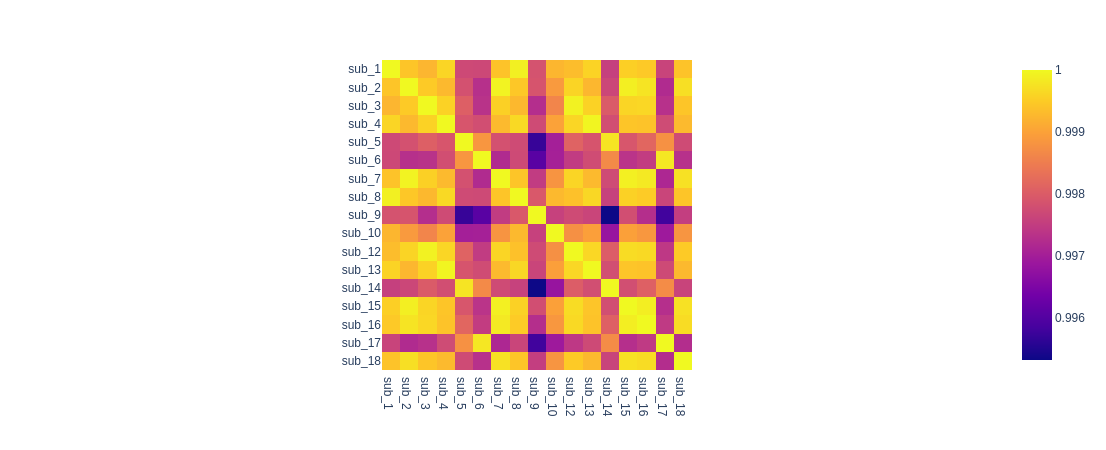

In [12]:
fig=px.imshow(l1_test_df.drop(["sub_11"], axis=1).corr())

fig.show()

In [ ]:
1, 3, 4, 5, 6, 8, 9

In [22]:
sub_5.head()

,id,claim
0,957919,0.558345
1,957920,0.120681
2,957921,0.626777
3,957922,0.129860
4,957923,0.152024


In [19]:
group_labels = ['cat_imp', 'xgb_imp', 'cat_no_imp', 'lgb_imp', 'lgb_no_imp', "xgb_no_imp"]

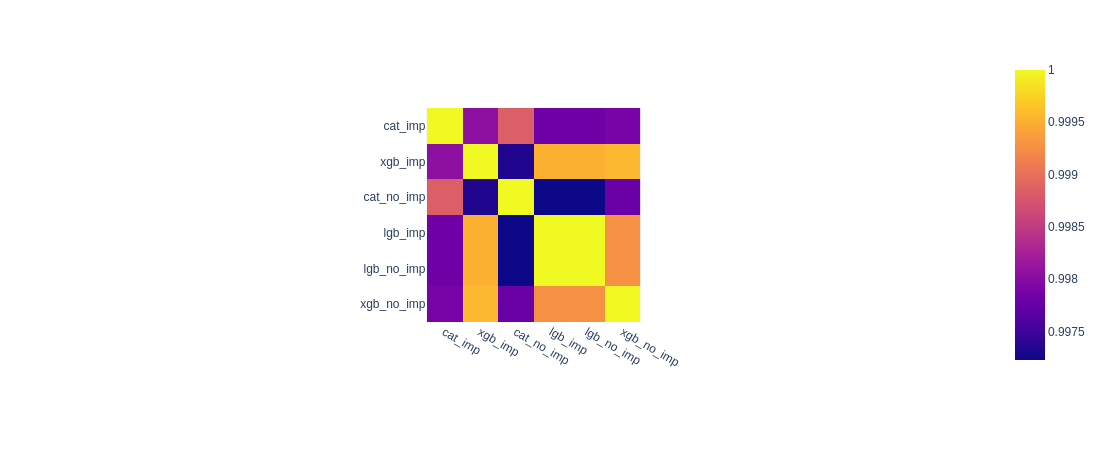

In [20]:
data = np.corrcoef([sub_1.claim, sub_2.claim, sub_3.claim, sub_4.claim, sub_5.claim, sub_6.claim])
fig=px.imshow(data, x=group_labels, y=group_labels)

fig.show()

In [42]:
# group_labels = ['cat_imp', 'xgb_imp', 'cat_no_imp', 'lgb_imp', 'lgb_no_imp', "xgb_no_imp"]
group_labels = ['"xgb_no_imp"', 'xgb_imp', 'lgb_no_imp', ]

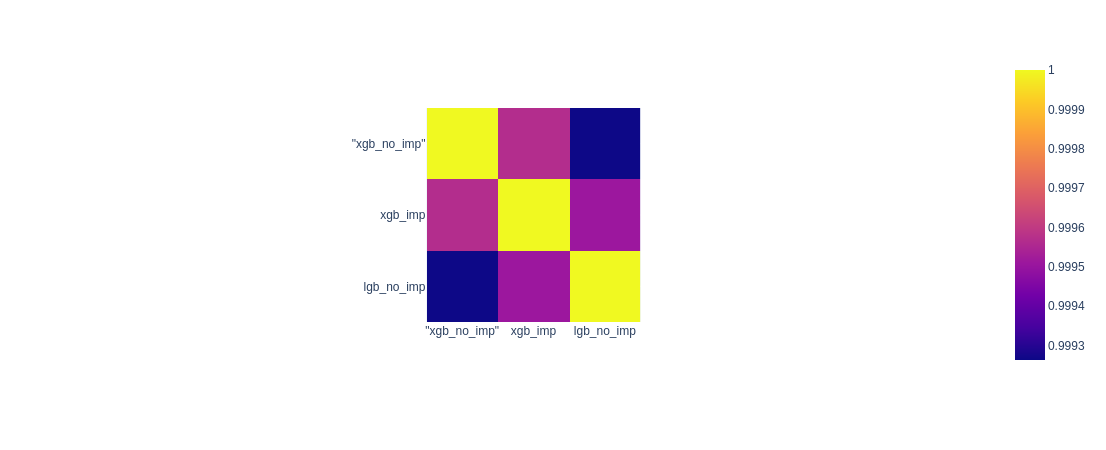

In [43]:
data = np.corrcoef([sub_6.claim, sub_2.claim, sub_5.claim,])
fig=px.imshow(data, x=group_labels, y=group_labels)

fig.show()

In [36]:
sub_6 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_no_imp_no_scaler_K_params_0922_1630_0.81634.gz")
sub_2 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_xgb_K10_nonull_mean_sum_max_custom_imp_StScaler_K_params_0921_2239_0.81649.gz")
sub_5 = pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_lgb_K5_nonull_mean_sum_max_no_imp_no_scaler_params_K_0922_1420_0.81623.gz")

In [37]:
# Power is arbitrary - refer to blog post for more info to get a better power
ensemble_df  = sub_6.copy()
ensemble_df.loc[:, 'claim'] = (sub_6**4 + sub_2**4 + sub_5**4)/3

In [38]:
logger = common.get_logger("main")

In [39]:
ensemble_df.head()

,id,claim
0,957919,0.105719
1,957920,0.000215
2,957921,0.159638
3,957922,0.000282
4,957923,0.000559


In [41]:
common.save_file(
        logger,
        ensemble_df,
        constants.SUBMISSION_DIR,
        f"sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz",
        index=False,
        compression="gzip",
    )

[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz
[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz
[INFO]2021-09-23 21:44:00,354:main:Saving /opt/vssexclude/personal/kaggle/k_tab_sept/submissions/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz


In [44]:
pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_power_4_xgb_no_imp_xgb_imp_lgb_no_imp.gz").head()

,id,claim
0,957919,0.105719
1,957920,0.000215
2,957921,0.159638
3,957922,0.000282
4,957923,0.000559


In [45]:
pd.read_csv(f"{constants.SUBMISSION_DIR}/sub_power_8_xgb_no_imp_xgb_imp_lgb_no_imp.gz").head()

,id,claim
0,957919,1.121322e-02
1,957920,4.628708e-08
2,957921,2.550113e-02
3,957922,8.007960e-08
4,957923,3.134850e-07
